In [229]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries

import pandasql as psql

In [230]:
# Load the Retail data

store= pd.read_csv("Stores.csv", header = 0)

# Copy to back-up files

store_bk= store.copy()

# Display first five claims data

store.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [231]:
#To find the information of dataset
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [232]:
#To check the duplicates
store_dup=store[store.duplicated(keep='last')]
store_dup

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales


In [233]:
#To check the null values
store.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [234]:
#delete ID column
del store['Store ID ']

In [235]:
#storing all columns under a list
cols=store.columns.tolist()

In [236]:
#Removing outliers
for i in cols:
  upper=round(store[i].mean() + 3 * store[i].std(),3)
  lower=round(store[i].mean() - 3 * store[i].std(),3)
  store=store[(store[i] > lower) & (store[i]< upper)]

In [237]:
#Displaying first 5 Rows of store
store.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [238]:
#To find the information of dataset
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            895 non-null    int64
 1   Items_Available       895 non-null    int64
 2   Daily_Customer_Count  895 non-null    int64
 3   Store_Sales           895 non-null    int64
dtypes: int64(4)
memory usage: 35.0 KB


In [239]:
#importing seaborn library
import seaborn as sns

<AxesSubplot:>

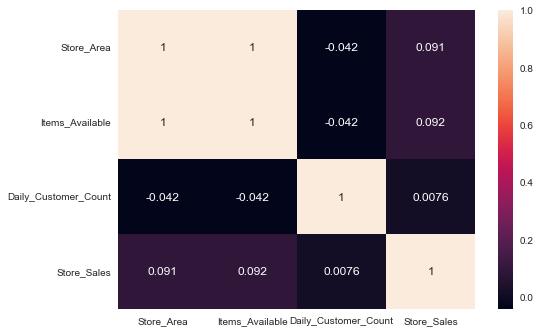

In [240]:
#drawing heatmap to check correlation between columns
sns.heatmap(store.corr(),annot=True)

In [241]:
#seperating dependent and independent variables
x=store.drop(['Store_Sales'],axis=1)
y=store['Store_Sales']

In [242]:
#Displaying first 5 Rows of x
x.head()

,Store_Area,Items_Available,Daily_Customer_Count
0,1659,1961,530
1,1461,1752,210
2,1340,1609,720
3,1451,1748,620
4,1770,2111,450


In [243]:
#importing matplotlib library
import matplotlib.pyplot as plt

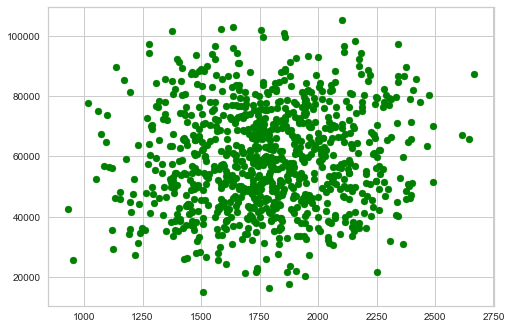

In [244]:
#ploting points on graph
plt.scatter(store['Items_Available'],store['Store_Sales'],color='green')

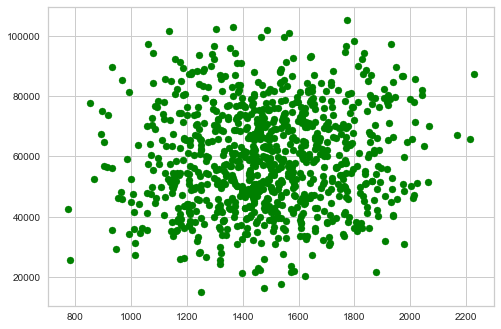

In [245]:
#ploting points on graph
plt.scatter(store['Store_Area'],store['Store_Sales'],color='green')

In [246]:
#Seperating train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [247]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)

In [248]:
#scaling the data
x_test=mmscaler.fit_transform(x_test)

In [249]:
# Build the multi regression model

from sklearn.linear_model import LinearRegression

# Create object for the model

ModelMLR = LinearRegression()

# Train the model with training data

ModelMLR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = ModelMLR.predict(x_test)
# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_pred)*100,3), '%')
# Define the function to calculate the MAPE - Mean Absolute Percentage Error
def MAPE (y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation of MAPE

result = MAPE(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')
# Calculate Adjusted R squared values

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 13991.554
Mean Squared Error (MSE): 284120550.764
Root Mean Squared Error (RMSE): 16855.876
R2_score: -0.000445
Root Mean Squared Log Error (RMSLE): 9.732
Mean Absolute Percentage Error (MAPE): 27.404 %
Mean Absolute Percentage Error (MAPE): 27.404 %
Adj R Square:  -0.003814


In [250]:
#loading RGRResults dataset
RGRResults=pd.read_csv('RGRResults.csv',header=0)

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Create objects of Regression / Regressor models with default hyper-parameters

ModelMLR = LinearRegression()
ModelDCR = DecisionTreeRegressor()
ModelRFR = RandomForestRegressor()
ModelETR = ExtraTreesRegressor()
ModelKNN = KNeighborsRegressor(n_neighbors=5)
ModelSVR=SVR(kernel='rbf')
MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR,ModelKNN,ModelSVR]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    RGRResults = RGRResults.append(new_row, ignore_index=True)

    #-------------------------------------------------------------------------------------------


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 13991.554
Mean Squared Error (MSE): 284120550.764
Root Mean Squared Error (RMSE): 16855.876
R2_score: -0.000445
Root Mean Squared Log Error (RMSLE): 9.732
Mean Absolute Percentage Error (MAPE): 27.4 %
Adj R Square:  -0.003814
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 19460.595
Mean Squared Error (MSE): 551834875.836
Root Mean Squared Error (RMSE): 23491.166
R2_score: -0.943121
Root Mean Squared Log Error (RMSLE): 10.064
Mean Absolute Percentage Error (MAPE): 36.59 %
Adj R Square:  -0.949663
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 14656.28
Mean Squared Error (MSE): 325517428.189
Root Mean Squared Error (RMSE): 18042.102
R2_score: -0.146212
Root Mean Squared Log Error (R

In [252]:
#Displaying the results
RGRResults

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),13991.55415,-0.003814,16855.875853,27.404172,284120550.763989,9.732455,-0.000445
1,DecisionTreeRegressor(),19460.594796,-0.949663,23491.165911,36.585342,551834875.836431,10.06438,-0.943121
2,"(DecisionTreeRegressor(max_features='auto', ra...",14656.280297,-0.150071,18042.101546,28.536374,325517428.188699,9.800463,-0.146212
3,"(ExtraTreeRegressor(random_state=1164858985), ...",15108.739405,-0.236925,18710.973305,29.316952,350100522.012825,9.836865,-0.232774
4,KNeighborsRegressor(),14837.464684,-0.192309,18370.421909,28.996011,337472401.115242,9.818497,-0.188308
5,SVR(),13971.53089,-0.004576,16862.27661,26.943216,284336372.456217,9.732834,-0.001205


In [253]:
# As all the models gives the worst performance on our dataset.we have to divide the data into different groups and assain 
# target groups to them using the clustering algorithms and then we again apply the regression models. 

# Applying Clustering

In [254]:
#importing the required libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [255]:
#scaling the x data
x[['Store_Area', 'Items_Available', 'Daily_Customer_Count']]=mmscaler.fit_transform(x[['Store_Area', 'Items_Available', 'Daily_Customer_Count']])

In [256]:
#joining of x variable with the target variable y
sales_join = x.join(y)
sales_join.columns

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

Text(0, 0.5, 'Inertia')

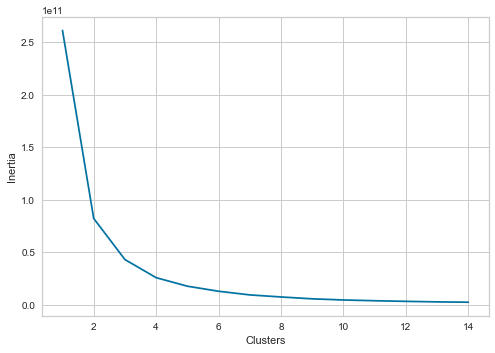

In [257]:
#Taking x data to find the target groups
sales_x = sales_join

x1= sales_x
#Elbow Method
clusters = []

for i in range(1, 15):
    km = KMeans(n_clusters=i).fit(x1)
    clusters.append(km.inertia_)
    
sns.lineplot(x=list(range(1, 15)), y=clusters)
plt.xlabel('Clusters')
plt.ylabel('Inertia')

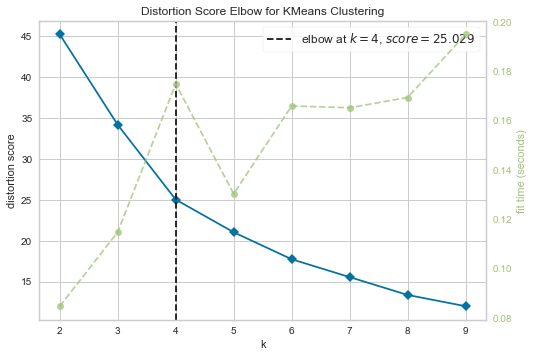

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [258]:
#To find the no.of clusters
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

from sklearn.cluster import KMeans

KM = KMeans(random_state=42)

visualizer = KElbowVisualizer(KM, k=(2,10))

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show() 

In [259]:
#Clustering and assaining the target groups 
km_4 = KMeans(n_clusters=4).fit(x1)
x['Target_Groups'] =km_4.labels_
x.head()

,Store_Area,Items_Available,Daily_Customer_Count,Target_Groups
0,0.607978,0.593084,0.335484,1
1,0.471802,0.472622,0.129032,2
2,0.388583,0.390202,0.458065,0
3,0.464924,0.470317,0.393548,0
4,0.684319,0.679539,0.283871,0


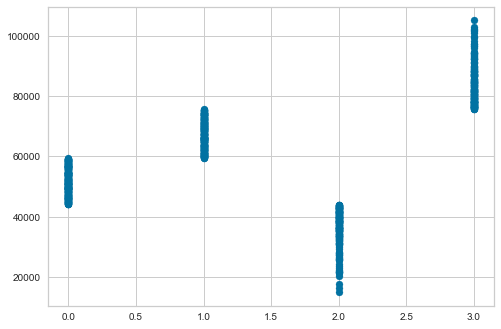

In [260]:
#displayed the target_groups ranges using matplotlib library 
plt.scatter(x['Target_Groups'],y)

In [261]:
#splitting the data to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 8) 

In [262]:
#loading the results dataset
RGResultsKNN=pd.read_csv('RGRResults.csv',header=0)

In [263]:
#For finding the best n_neighbors value for the KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

MM = [i for i in range(1,17)]

for j in MM:

    # Fit the model with train data
    models=KNeighborsRegressor(n_neighbors=j)
    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    RGResultsKNN = RGResultsKNN.append(new_row, ignore_index=True)

    #-------------------------------------------------------------------------------------------


Model Name:  KNeighborsRegressor(n_neighbors=1)
Mean Absolute Error (MAE): 5974.358
Mean Squared Error (MSE): 58742859.777
Root Mean Squared Error (RMSE): 7664.389
R2_score: 0.796635
Root Mean Squared Log Error (RMSLE): 8.944
Mean Absolute Percentage Error (MAPE): 11.43 %
Adj R Square:  0.795721
------------------------------------------------------------------------------------------------------------
Model Name:  KNeighborsRegressor(n_neighbors=2)
Mean Absolute Error (MAE): 5254.497
Mean Squared Error (MSE): 43087935.335
Root Mean Squared Error (RMSE): 6564.14
R2_score: 0.850831
Root Mean Squared Log Error (RMSLE): 8.789
Mean Absolute Percentage Error (MAPE): 10.09 %
Adj R Square:  0.850161
------------------------------------------------------------------------------------------------------------
Model Name:  KNeighborsRegressor(n_neighbors=3)
Mean Absolute Error (MAE): 4883.762
Mean Squared Error (MSE): 37461562.011
Root Mean Squared Error (RMSE): 6120.585
R2_score: 0.87031
Root Me

In [264]:
RGResultsKNN
#From the results we have identified that the n_neighbors value is 14

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,KNeighborsRegressor(n_neighbors=1),5974.357542,0.795721,7664.389067,11.431113,58742859.776536,8.94434,0.796635
1,KNeighborsRegressor(n_neighbors=2),5254.497207,0.850161,6564.140106,10.092026,43087935.335196,8.789377,0.850831
2,KNeighborsRegressor(n_neighbors=3),4883.761639,0.869727,6120.585104,9.559821,37461562.011173,8.719413,0.87031
3,KNeighborsRegressor(n_neighbors=4),4627.73743,0.881046,5848.642456,9.170159,34206618.575419,8.673965,0.881578
4,KNeighborsRegressor(),4548.100559,0.886543,5711.905401,9.088129,32625863.307263,8.650308,0.887051
5,KNeighborsRegressor(n_neighbors=6),4429.087523,0.891847,5576.786395,8.895604,31100546.492862,8.626368,0.892331
6,KNeighborsRegressor(n_neighbors=7),4411.22905,0.89426,5514.237966,8.839567,30406820.351157,8.615089,0.894733
7,KNeighborsRegressor(n_neighbors=8),4407.402235,0.895223,5489.059042,8.749401,30129769.168994,8.610512,0.895692
8,KNeighborsRegressor(n_neighbors=9),4324.96586,0.900179,5357.651199,8.591835,28704426.374233,8.586281,0.900626
9,KNeighborsRegressor(n_neighbors=10),4308.251397,0.899179,5384.459219,8.565336,28992401.078212,8.591272,0.89963


In [265]:
#loading the results dataset
RGResultsSVR=pd.read_csv('RGRResults.csv',header=0)

In [266]:
#For finding the best kernel value for SVR
from sklearn.svm import SVR

MM =['linear', 'poly', 'rbf', 'sigmoid'] 

for j in MM:

    # Fit the model with train data
    models=SVR(kernel=j)
    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    RGResultsSVR = RGResultsSVR.append(new_row, ignore_index=True)

    #-------------------------------------------------------------------------------------------


Model Name:  SVR(kernel='linear')
Mean Absolute Error (MAE): 13817.142
Mean Squared Error (MSE): 284390185.031
Root Mean Squared Error (RMSE): 16863.872
R2_score: 0.015453
Root Mean Squared Log Error (RMSLE): 9.733
Mean Absolute Percentage Error (MAPE): 27.7 %
Adj R Square:  0.011028
------------------------------------------------------------------------------------------------------------
Model Name:  SVR(kernel='poly')
Mean Absolute Error (MAE): 11620.829
Mean Squared Error (MSE): 233781265.359
Root Mean Squared Error (RMSE): 15289.907
R2_score: 0.190659
Root Mean Squared Log Error (RMSLE): 9.635
Mean Absolute Percentage Error (MAPE): 26.64 %
Adj R Square:  0.187022
------------------------------------------------------------------------------------------------------------
Model Name:  SVR()
Mean Absolute Error (MAE): 13923.415
Mean Squared Error (MSE): 288155976.237
Root Mean Squared Error (RMSE): 16975.158
R2_score: 0.002416
Root Mean Squared Log Error (RMSLE): 9.74
Mean Absolute 

In [267]:
RGResultsSVR
#Based on the results taking kernel='poly' performs better

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,SVR(kernel='linear'),13817.142484,0.011028,16863.872184,27.70228,284390185.030747,9.732929,0.015453
1,SVR(kernel='poly'),11620.828901,0.187022,15289.907304,26.642382,233781265.359303,9.634948,0.190659
2,SVR(),13923.415323,-0.002068,16975.15762,27.652556,288155976.237154,9.739506,0.002416
3,SVR(kernel='sigmoid'),13939.215216,-0.003565,16987.841657,27.668284,288586764.171978,9.740253,0.000925


In [268]:
#loading the RGRResults dataset
RGRResultsAfter=pd.read_csv('RGRResults.csv',header=0)

In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
# Create objects of Regression / Regressor models with identified hyper-parameters

ModelMLR = LinearRegression()
ModelDCR = DecisionTreeRegressor()
ModelRFR = RandomForestRegressor()
ModelETR = ExtraTreesRegressor()
ModelKNN = KNeighborsRegressor(n_neighbors=14)
ModelSVR=SVR(kernel='poly')
# Evalution matrix for all the algorithms

MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR, ModelKNN,ModelSVR]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    RGRResultsAfter = RGRResultsAfter.append(new_row, ignore_index=True)

    #-------------------------------------------------------------------------------------------


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 12457.213
Mean Squared Error (MSE): 255347749.979
Root Mean Squared Error (RMSE): 15979.604
R2_score: 0.115997
Root Mean Squared Log Error (RMSLE): 9.679
Mean Absolute Percentage Error (MAPE): 27.02 %
Adj R Square:  0.112024
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 5502.793
Mean Squared Error (MSE): 51153101.676
Root Mean Squared Error (RMSE): 7152.14
R2_score: 0.82291
Root Mean Squared Log Error (RMSLE): 8.875
Mean Absolute Percentage Error (MAPE): 10.71 %
Adj R Square:  0.822114
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 4432.756
Mean Squared Error (MSE): 32286600.292
Root Mean Squared Error (RMSE): 5682.13
R2_score: 0.888225
Root Mean Squared Log Error (RMSLE): 8.645


In [270]:
#Displaying the Results After Clustering
RGRResultsAfter

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),12457.212845,0.112024,15979.604187,27.023594,255347749.979379,9.679068,0.115997
1,DecisionTreeRegressor(),5502.793296,0.822114,7152.139657,10.71316,51153101.675978,8.875167,0.82291
2,"(DecisionTreeRegressor(max_features='auto', ra...",4432.755866,0.887723,5682.129908,8.684847,32286600.292346,8.645081,0.888225
3,"(ExtraTreeRegressor(random_state=1468928856), ...",4646.192737,0.880671,5857.844966,9.067188,34314347.65067,8.675537,0.881205
4,KNeighborsRegressor(n_neighbors=14),4208.934557,0.902481,5295.557388,8.295949,28042928.049823,8.574624,0.902917
5,SVR(kernel='poly'),11620.828901,0.187022,15289.907304,26.642382,233781265.359303,9.634948,0.190659


In [271]:
#Based on the above Analysis ModelKNN gives the best results and converting the predicted_results type to int
y_predF= ModelKNN.predict(x_test).astype(int)

In [272]:
#storing the predicted values in the backup dataset
Results =pd.DataFrame({'Store_Sales_A':y_test,'Store_Sales_P':y_predF})
ResultsFinal=store_bk.merge(Results,left_index=True,right_index=True)

In [273]:
#Displaying any 5 rows in the ResultsFinal data
ResultsFinal.sample(5)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Sales_A,Store_Sales_P
521,522,1688,2037,590,50960,50960,51135
843,844,1463,1751,900,49990,49990,52150
894,895,1299,1560,770,96610,96610,83950
181,182,1174,1396,1100,40930,40930,33639
355,356,1269,1511,500,54360,54360,51427
